In [2]:
import networkx as nx
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import copy

In [3]:
# Reading in graph 
G0 = nx.read_weighted_edgelist("bakers_yeast.txt",comments="#",nodetype=str)

In [4]:
# Deleting edges that don't meet threshold score
threshold_score = 700
for edge in G0.edges: 
    weight = list(G0.get_edge_data(edge[0],edge[1]).values())
    if(weight[0] <= threshold_score):
        G0.remove_edge(edge[0],edge[1])

# Reading in essential proteins file
df = pd.read_csv("essential_proteins.csv", header=None)
essential_proteins = df[1].values

# Deleting essential proteins
for protein in essential_proteins:
  str = "4932." + protein
  if str in G0.nodes and str != "4932.YJL034W":
    G0.remove_node(str)

In [115]:
print(G0.number_of_nodes())

4671


In [16]:
# Deleting proteins of degree zero
G0.remove_nodes_from(list(nx.isolates(G0)))

In [5]:
import markov_clustering as mc

In [106]:
matrix = nx.to_scipy_sparse_matrix(G0)
result = mc.run_mcl(matrix, inflation=2.5)           # run MCL with default parameters
clusters = mc.get_clusters(result)

C:\Users\amool\AppData\Local\Temp\ipykernel_28404\3841808823.py:1: DeprecationWarning: 

The scipy.sparse array containers will be used instead of matrices
in Networkx 3.0. Use `to_scipy_sparse_array` instead.
  matrix = nx.to_scipy_sparse_matrix(G0)


In [107]:
markov = copy.deepcopy(clusters)
l = list(G0.nodes)

# Iterate through clusters and put in original names of proteins
for i in range(len(clusters)):
  markov[i] = list(markov[i])
  for j in range(len(clusters[i])):
    markov[i][j] = l[markov[i][j]]

markov.sort(key=len, reverse=True)

Getting community information

In [108]:
homologs = ["4932.YJR109C", "4932.YDL052C", "4932.YKL140W", "4932.YLL012W", "4932.YBR041W", "4932.YLR113W", "4932.YJL130C", "4932.YJL034W"]
print("Number of communities: {}".format(len(markov)))
size_of_communities = [len(community) for community in markov]
print("Sizes of communities: ", size_of_communities)

indexes = []
for homolog in homologs:
  i = 0
  for community in markov:
    if homolog in community:
      indexes.append(i)
      break
    i += 1 

print(list(zip(homologs, indexes)))

Number of communities: 1408
Sizes of communities:  [132, 106, 82, 57, 53, 52, 45, 43, 42, 37, 32, 32, 32, 31, 31, 29, 28, 28, 26, 26, 25, 25, 23, 22, 22, 22, 21, 21, 20, 20, 20, 20, 20, 19, 18, 18, 17, 17, 17, 17, 17, 16, 16, 16, 16, 16, 16, 15, 15, 15, 15, 15, 14, 14, 14, 14, 14, 13, 13, 13, 13, 13, 12, 12, 12, 12, 12, 12, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 

Drawing community 14, containing YDL052C and YLL012W

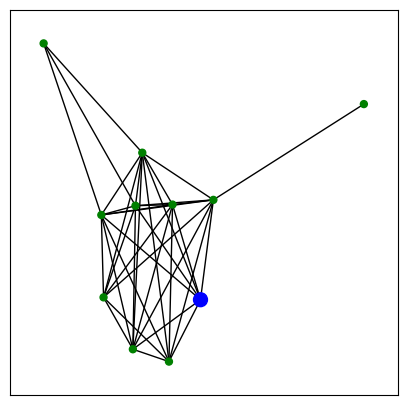

In [114]:
sub = G0.subgraph(list(markov[69])).copy()

sub.remove_nodes_from(list(nx.isolates(sub)))

color_map = []

for node in sub.nodes:
  if node == "4932.YBR041W":
    color_map.append("blue")
  elif node == "4932.YLL012W":
    color_map.append("red")
  else:
    color_map.append("green")

node_size_map = [100 if node == "4932.YBR041W" or node == "4932.YLL012W" else 25 for node in sub.nodes]  


plt.figure(3,figsize=(5,5))
nx.draw_networkx(sub, linewidths=1, with_labels=False, node_color=color_map, node_size = node_size_map)
plt.show()

Drawing community 135, containing YDL052C and YLL012W

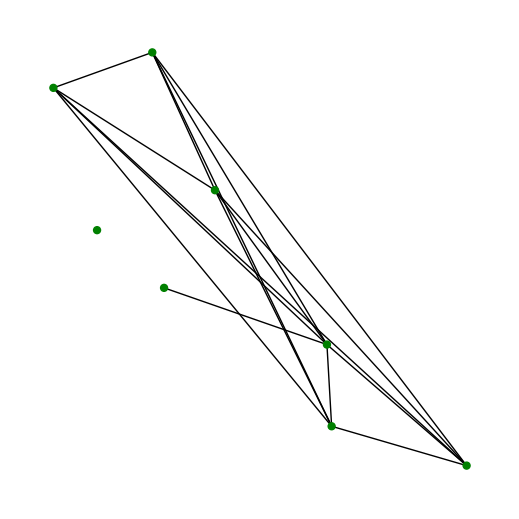

In [85]:
sub = G0.subgraph(list(markov[135]))
color_map = []

for node in sub.nodes:
  if node == "4932.YKL140W":
    color_map.append("blue")
  elif node == "4932.YBR041W":
    color_map.append("red")
  else:
    color_map.append("green")

node_size_map = [100 if node == "4932.YKL140W" or node == "4932.YBR041W" else 25 for node in sub.nodes]  


plt.figure(3,figsize=(5,5))
nx.draw(sub, pos=nx.random_layout(sub), linewidths=1, with_labels=False, node_color=color_map, node_size = node_size_map)
plt.show()

In [86]:
louvain = nx.algorithms.community.louvain_communities(G0)
louvain.sort(key=len, reverse=True)

print("Number of communities: {}".format(len(louvain)))
size_of_communities = [len(community) for community in louvain]
print("Sizes of communities: ", size_of_communities)

indexes = []
for homolog in homologs:
  i = 0
  for community in louvain:
    if homolog in community:
      indexes.append(i)
      break
    i += 1 

print(list(zip(homologs, indexes)))

Number of communities: 29
Sizes of communities:  [801, 519, 492, 390, 383, 316, 313, 223, 219, 207, 185, 158, 136, 130, 107, 24, 19, 11, 7, 7, 5, 4, 3, 2, 2, 2, 2, 2, 2]
[('4932.YJR109C', 0), ('4932.YDL052C', 10), ('4932.YKL140W', 10), ('4932.YLL012W', 10), ('4932.YBR041W', 10), ('4932.YLR113W', 1), ('4932.YJL130C', 0), ('4932.YJL034W', 2)]


In [92]:
print("Number of communities: {}".format(len(gn)))
size_of_communities = [len(community) for community in gn]
print("Sizes of communities: ", size_of_communities)

indexes = []
for homolog in homologs:
  i = 0
  for community in gn:
    if homolog in community:
      indexes.append(i)
      break
    i += 1 

print(list(zip(homologs, indexes)))

TypeError: object of type 'generator' has no len()

We use different library because this one is a bit scuffed

Georg thinks human -> yeast homolog is a good idea

Idea on the left:
- We induce subgraph/subgraph of proteins + 1 degree of separation away
- Find communities using MCL or Louvain to get us communities of size ~30
- Determine if these communities are functional
- Find bottlenecks/hub proteins of each complex
- This gives us relevant proteins for treatment or disrupting pathways

Pathway enrichment

Idea on the right:
- Pathway enrichment (community enrichment)